# Mini-Project: Data Wrangling and Transformation with Pandas

Working with tabular data is a necessity for anyone with enterprises having a majority of their data in relational databases and flat files. This mini-project is adopted from the excellent tutorial on pandas by Brandon Rhodes which you have watched earlier in the Data Wrangling Unit. In this mini-project, we will be looking at some interesting data based on movie data from the IMDB.

This assignment should help you reinforce the concepts you learnt in the curriculum for Data Wrangling and sharpen your skills in using Pandas. Good Luck!

### Please make sure you have one of the more recent versions of Pandas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.__version__

'1.0.1'

## Taking a look at the Movies dataset
This data shows the movies based on their title and the year of release

In [3]:
movies = pd.read_csv('titles.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244914 entries, 0 to 244913
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   244914 non-null  object
 1   year    244914 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
movies.head()

,title,year
0,The Ticket to the Life,2009
1,Parallel Worlds: A New Rock Music Experience,2016
2,Morita - La hija de Jesus,2008
3,Gun,2017
4,Love or Nothing at All,2014


## Taking a look at the Cast dataset

This data shows the cast (actors, actresses, supporting roles) for each movie

- The attribute `n` basically tells the importance of the cast role, lower the number, more important the role.
- Supporting cast usually don't have any value for `n`

In [5]:
cast = pd.read_csv('cast.csv.zip')
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3786176 entries, 0 to 3786175
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 173.3+ MB


In [6]:
cast.head(10)

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


## Taking a look at the Release dataset

This data shows details of when each movie was release in each country with the release date

In [7]:
release_dates = pd.read_csv('release_dates.csv', parse_dates=['date'], infer_datetime_format=True)
release_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479488 entries, 0 to 479487
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    479488 non-null  object        
 1   year     479488 non-null  int64         
 2   country  479488 non-null  object        
 3   date     479488 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 14.6+ MB


In [8]:
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


# Section I - Basic Querying, Filtering and Transformations

### What is the total number of movies?

In [9]:
len(movies)

244914

### List all Batman movies ever made

In [10]:
batman_df = movies[movies.title == 'Batman']
print('Total Batman Movies:', len(batman_df))
batman_df

Total Batman Movies: 2


,title,year
52734,Batman,1943
150621,Batman,1989


### List all Batman movies ever made - the right approach

In [11]:
batman_df = movies[movies.title.str.contains('Batman', case=False)]
print('Total Batman Movies:', len(batman_df))
batman_df.head(10)

Total Batman Movies: 35


,title,year
16813,Batman: Anarchy,2016
30236,Batman Forever,1995
31674,Batman Untold,2010
31711,Scooby-Doo & Batman: the Brave and the Bold,2018
41881,Batman the Rise of Red Hood,2018
43484,Batman: Return of the Caped Crusaders,2016
46333,Batman & Robin,1997
51811,Batman Revealed,2012
52734,Batman,1943
56029,Batman Beyond: Rising Knight,2014


### Display the top 15 Batman movies in the order they were released

In [12]:
batman_df.sort_values(by=['year'], ascending=True).iloc[:15]

,title,year
52734,Batman,1943
100056,Batman and Robin,1949
161439,Batman Dracula,1964
84327,Alyas Batman at Robin,1965
68364,James Batman,1966
161527,Batman: The Movie,1966
56159,Batman Fights Dracula,1967
168504,"Fight! Batman, Fight!",1973
150621,Batman,1989
156239,Alyas Batman en Robin,1991


### Section I - Q1 : List all the 'Harry Potter' movies from the most recent to the earliest

In [14]:
movies[movies.title.str.contains("Harry Potter")].sort_values(by = ['year'], ascending = False)

,title,year
143147,Harry Potter and the Deathly Hallows: Part 2,2011
152831,Harry Potter and the Deathly Hallows: Part 1,2010
109213,Harry Potter and the Half-Blood Prince,2009
50581,Harry Potter and the Order of the Phoenix,2007
187926,Harry Potter and the Goblet of Fire,2005
61957,Harry Potter and the Prisoner of Azkaban,2004
82791,Harry Potter and the Chamber of Secrets,2002
223087,Harry Potter and the Sorcerer's Stone,2001


### How many movies were made in the year 2017?

In [10]:
len(movies[movies.year == 2017])

11474

### Section I - Q2 : How many movies were made in the year 2015?

In [15]:
len(movies[movies.year == 2015])

8702

### Section I - Q3 : How many movies were made from 2000 till 2018?
- You can chain multiple conditions using OR (`|`) as well as AND (`&`) depending on the condition

In [27]:
len(movies[(movies.year >= 2000) & (movies.year <= 2018)])

244914

### Section I - Q4: How many movies are titled "Hamlet"?

In [30]:
len(movies[movies.title == "Hamlet"])

20

In [29]:
len(movies[movies.title.str.contains("Hamlet")])

57

### Section I - Q5: List all movies titled "Hamlet" 
- The movies should only have been released on or after the year 2000
- Display the movies based on the year they were released (earliest to most recent)

In [33]:
movies[(movies.title == "Hamlet") & (movies.year >= 2000)].sort_values(by = "year", ascending = False)

,title,year
244747,Hamlet,2017
191940,Hamlet,2016
186137,Hamlet,2015
178290,Hamlet,2014
227953,Hamlet,2011
1931,Hamlet,2009
55639,Hamlet,2000


### Section I - Q6: How many roles in the movie "Inception" are of the supporting cast (extra credits)
- supporting cast are NOT ranked by an "n" value (NaN)
- check for how to filter based on nulls

In [39]:
len(cast[(cast.title == "Inception") & cast.n.isnull()])

27

### Section I - Q7: How many roles in the movie "Inception" are of the main cast
- main cast always have an 'n' value

In [45]:
len(cast[(cast.title == "Inception") & cast.n.notnull()])

51

### Section I - Q8: Show the top ten cast (actors\actresses) in the movie "Inception" 
- main cast always have an 'n' value
- remember to sort!

In [48]:
cast[(cast.title == "Inception") & cast.n.notnull()].sort_values(by = ['n'], ascending = False).head(10)

,title,year,name,type,character,n
3731263,Inception,2010,Shannon Welles,actress,Old Mal,51.0
833376,Inception,2010,Jack Gilroy,actor,Old Cobb,50.0
2250605,Inception,2010,Jason Tendell,actor,Fischer's Driver,49.0
3473041,Inception,2010,Lisa (II) Reynolds,actress,Private Nurse,48.0
1812091,Inception,2010,Andrew Pleavin,actor,Businessman,47.0
2049179,Inception,2010,Felix Scott,actor,Businessman,46.0
807795,Inception,2010,Michael Gaston,actor,Immigration Officer,45.0
149008,Inception,2010,Peter Basham,actor,Fischer's Jet Captain,44.0
3444628,Inception,2010,Nicole Pulliam,actress,Lobby Sub Con,43.0
3203564,Inception,2010,Alex (II) Lombard,actress,Lobby Sub Con,42.0


### Section I - Q9:

(A) List all movies where there was a character 'Albus Dumbledore' 

(B) Now modify the above to show only the actors who played the character 'Albus Dumbledore'
- For Part (B) remember the same actor might play the same role in multiple movies

In [49]:
cast[(cast.character == "Albus Dumbledore")].title.unique()

array(['Epic Movie', 'Harry Potter and the Goblet of Fire',
       'Harry Potter and the Order of the Phoenix',
       'Harry Potter and the Prisoner of Azkaban',
       'Harry Potter and the Chamber of Secrets',
       "Harry Potter and the Sorcerer's Stone", 'Ultimate Hero Project',
       'Potter'], dtype=object)

In [51]:
cast[(cast.character == "Albus Dumbledore")][['title','name']].drop_duplicates()

,title,name
704984,Epic Movie,Dane Farwell
792421,Harry Potter and the Goblet of Fire,Michael Gambon
792423,Harry Potter and the Order of the Phoenix,Michael Gambon
792424,Harry Potter and the Prisoner of Azkaban,Michael Gambon
947789,Harry Potter and the Chamber of Secrets,Richard Harris
947790,Harry Potter and the Sorcerer's Stone,Richard Harris
1685537,Ultimate Hero Project,George (X) O'Connor
2248085,Potter,Timothy Tedmanson


### Section I - Q10:

(A) How many roles has 'Keanu Reeves' played throughout his career?

(B) List the leading roles that 'Keanu Reeves' played on or after 1999 in order by year.

In [56]:
len(cast[(cast.name == "Keanu Reeves")][['title','year','character']].drop_duplicates())

62

In [68]:
cast[(cast.name == "Keanu Reeves") & cast.n.notnull() & (cast.year >= 1999)][['title','year','character','n']].drop_duplicates().sort_values(by = ['year'], ascending = True)

,title,year,character,n
1892370,Me and Will,1999,Himself,42.0
1892369,Me and Will,1999,Dogstar,42.0
1892390,The Matrix,1999,Neo,1.0
1892398,The Watcher,2000,Griffin,3.0
1892397,The Replacements,2000,Shane Falco,1.0
1892387,The Gift,2000,Donnie Barksdale,3.0
1892383,Sweet November,2001,Nelson Moss,1.0
1892358,Hard Ball,2001,Conor O'Neill,1.0
1892379,Something's Gotta Give,2003,Julian Mercer,3.0
1892391,The Matrix Reloaded,2003,Neo,59.0


### Section I - Q11: 

(A) List the total number of actor and actress roles available from 1950 - 1960

(B) List the total number of actor and actress roles available from 2007 - 2017

In [64]:
len(cast[(cast.year >= 1950) & (cast.year <= 1960)][['title','year','character']].drop_duplicates())

204664

In [65]:
len(cast[(cast.year >= 2007) & (cast.year <= 2017)][['title','year','character']].drop_duplicates())

1266482

### Section I - Q12: 

(A) List the total number of leading roles available from 2000 to present

(B) List the total number of non-leading roles available from 2000 - present (exclude support cast)

(C) List the total number of support\extra-credit roles available from 2000 - present

In [67]:
len(cast[(cast.year >= 2000) & cast.n.notnull()][['title','year','character']].drop_duplicates())

947907

In [71]:
len(cast[(cast.year >= 2000) & cast.n.isnull()][['title','year','character']].drop_duplicates())

769025

# Section II - Aggregations, Transformations and Visualizations

## What are the top ten most common movie names of all time?


In [69]:
top_ten = movies.title.value_counts()[:10]
top_ten

Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    12
Temptation              12
Freedom                 11
The Three Musketeers    11
Honeymoon               11
Othello                 11
Name: title, dtype: int64

### Plot the top ten common movie names of all time

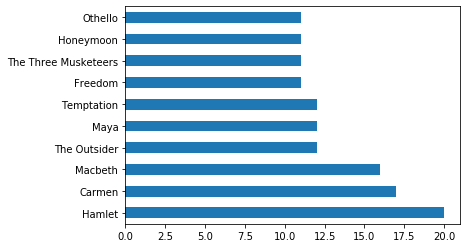

In [70]:
top_ten.plot(kind='barh')

### Section II - Q1:  Which years in the 2000s saw the most movies released? (Show top 3)

In [77]:
movies[(movies.year >= 2000) & (movies.year < 2010)].year.value_counts()[:3]

2009    6125
2008    5151
2007    4467
Name: year, dtype: int64

### Section II - Q2: # Plot the total number of films released per-decade (1890, 1900, 1910,....)
- Hint: Dividing the year and multiplying with a number might give you the decade the year falls into!
- You might need to sort before plotting

In [80]:
movies['decade'] = movies['year']//10 * 10

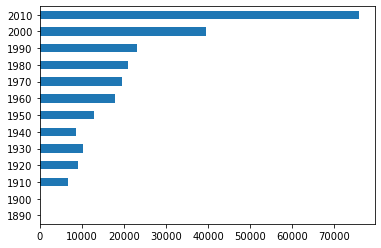

In [107]:
movies[movies.decade <= 2010].decade.value_counts().sort_index().plot(kind = "barh")

### Section II - Q3: 

(A) What are the top 10 most common character names in movie history?

(B) Who are the top 10 people most often credited as "Herself" in movie history?

(C) Who are the top 10 people most often credited as "Himself" in movie history?

In [95]:
cast.character.value_counts().sort_values(ascending = False)[:10]

Himself        20746
Dancer         12477
Extra          11948
Reporter        8434
Student         7773
Doctor          7669
Party Guest     7245
Policeman       7029
Nurse           6999
Bartender       6802
Name: character, dtype: int64

In [98]:
cast[cast.character == "Herself"].name.value_counts().sort_values(ascending = False)[:10]

Queen Elizabeth II           12
Joyce Brothers                9
Mar?a Luisa (V) Mart?n        9
Luisa Horga                   9
Margaret Thatcher             8
Hillary Clinton               8
Joan Rivers                   6
Marilyn Monroe                6
In?s J. Southern              6
Mar?a Isabel (III) Mart?n     6
Name: name, dtype: int64

In [99]:
cast[cast.character == "Himself"].name.value_counts().sort_values(ascending = False)[:10]

Adolf Hitler             99
Richard Nixon            44
Ronald Reagan            41
John F. Kennedy          37
George W. Bush           25
Winston Churchill        24
Martin Luther King       23
Ron Jeremy               22
Bill Clinton             22
Franklin D. Roosevelt    21
Name: name, dtype: int64

### Section II - Q4: 

(A) What are the top 10 most frequent roles that start with the word "Zombie"?

(B) What are the top 10 most frequent roles that start with the word "Police"?

- Hint: The `startswith()` function might be useful

In [103]:
cast[cast.character.str.startswith("Zombie")].character.value_counts().sort_values(ascending = False)[:10]

Zombie                         6264
Zombie Horde                    206
Zombie - Protestor - Victim      78
Zombie Extra                     70
Zombie Dancer                    43
Zombie Girl                      36
Zombie #1                        36
Zombie #2                        31
Zombie Vampire                   25
Zombie Victim                    22
Name: character, dtype: int64

In [104]:
cast[cast.character.str.startswith("Police")].character.value_counts().sort_values(ascending = False)[:10]

Policeman              7029
Police Officer         4808
Police Inspector        742
Police Sergeant         674
Police officer          539
Police                  456
Policewoman             415
Police Chief            410
Police Captain          387
Police Commissioner     337
Name: character, dtype: int64

### Section II - Q5: Plot how many roles 'Keanu Reeves' has played in each year of his career.

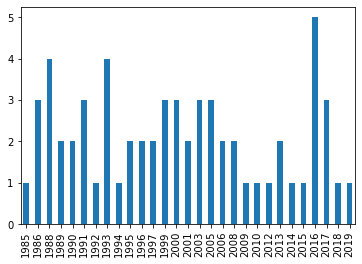

In [109]:
cast[cast.name == "Keanu Reeves"].year.value_counts().sort_index().plot(kind = "bar")

### Section II - Q6: Plot the cast positions (n-values) of Keanu Reeve's roles through his career over the years.


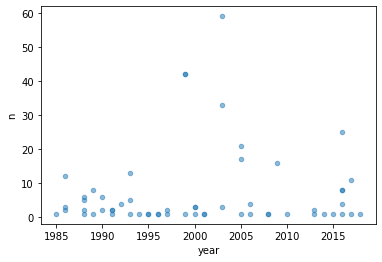

In [117]:
cast[cast.name == "Keanu Reeves"][['year','n']].plot(x = "year", y = "n", kind = "scatter", alpha = 0.5)

### Section II - Q7: Plot the number of "Hamlet" films made by each decade

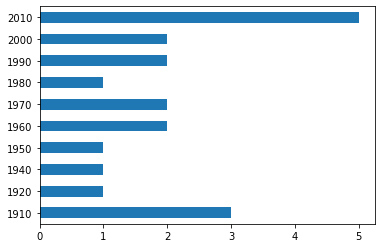

In [112]:
movies[movies.title == "Hamlet"].decade.value_counts().sort_index().plot(kind = "barh")

### Section II - Q8: 

(A) How many leading roles were available to both actors and actresses, in the 1960s (1960-1969)?

(B) How many leading roles were available to both actors and actresses, in the 2000s (2000-2009)?

- Hint: A specific value of n might indicate a leading role

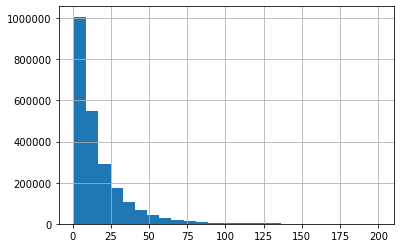

In [121]:
cast[cast.n <= 200].n.hist(bins = 25)

### Section II - Q9: List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [143]:
frank_counts = cast[(cast.name == "Frank Oz")][['year','title','n']].groupby(['year','title']).count()

In [146]:
frank_counts[frank_counts.n > 1].sort_values( by = ['year'])

n
year title                                  
1979 The Muppet Movie                      8
1981 An American Werewolf in London        2
     The Great Muppet Caper                6
1982 The Dark Crystal                      2
1984 The Muppets Take Manhattan            7
1985 Follow That Bird                      3
1992 The Muppet Christmas Carol            7
1996 Muppet Treasure Island                4
1999 Muppets from Space                    4
     The Adventures of Elmo in Grouchland  3

### Section II - Q10: List each of the characters that Frank Oz has portrayed at least twice

In [150]:
frank_char = cast[(cast.name == "Frank Oz")].character.value_counts()
frank_char[frank_char > 1]

Animal            6
Miss Piggy        6
Yoda              6
Cookie Monster    5
Sam the Eagle     5
Fozzie Bear       4
Bert              3
Grover            2
Name: character, dtype: int64

# Section III - Advanced Merging, Querying and Visualizations

## Make a bar plot with the following conditions
- Frequency of the number of movies with "Christmas" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

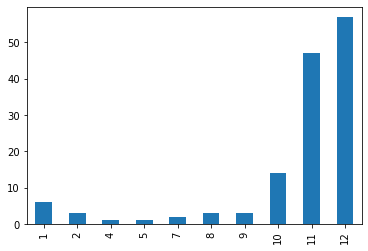

In [151]:
christmas = release_dates[(release_dates.title.str.contains('Christmas')) & (release_dates.country == 'USA')]
christmas.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q1: Make a bar plot with the following conditions
- Frequency of the number of movies with "Summer" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by month

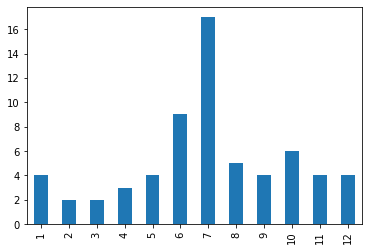

In [156]:
summer = release_dates[(release_dates.title.str.contains('Summer')) & (release_dates.country == 'USA')]
summer.date.dt.month.value_counts().sort_index().plot(kind='bar')

### Section III - Q2: Make a bar plot with the following conditions
- Frequency of the number of movies with "Action" in their title 
- Movies should be such that they are released in the USA.
- Show the frequency plot by week

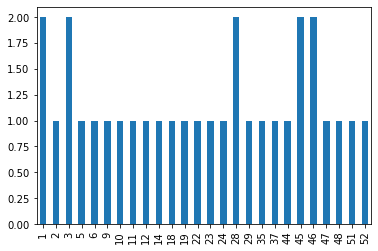

In [155]:
action = release_dates[(release_dates.title.str.contains('Action')) & (release_dates.country == 'USA')]
action.date.dt.week.value_counts().sort_index().plot(kind='bar')

### Section III - Q3: Show all the movies in which Keanu Reeves has played the lead role along with their   release date in the USA sorted by the date of release
- Hint: You might need to join or merge two datasets!

In [166]:
release_dates.index

RangeIndex(start=0, stop=479488, step=1)

In [168]:
k_total = cast[cast.name == "Keanu Reeves"][["title","year","n"]].join(other = release_dates.set_index(['year','title']), on = ["year","title"])

### Section III - Q4: Make a bar plot showing the months in which movies with Keanu Reeves tend to be released in the USA?

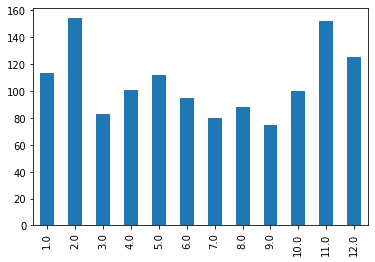

In [173]:
k_total.date.dt.month.value_counts().sort_index().plot(kind = "bar")

### Section III - Q5: Make a bar plot showing the years in which movies with Ian McKellen tend to be released in the USA?

In [174]:
i_total = cast[cast.name == "Keanu Reeves"][["title","year","n"]].join(other = release_dates.set_index(['year','title']), on = ["year","title"])

In [175]:
total

,title,year,n,country,date
0,Closet Monster,2015,31.0,Taiwan,2016-05-27
0,Closet Monster,2015,31.0,Germany,2016-10-06
0,Closet Monster,2015,31.0,France,2017-12-13
1,Suuri illusioni,1985,22.0,Finland,1985-11-01
1,Suuri illusioni,1985,22.0,Denmark,1987-09-21
...,...,...,...,...,...
3786173,Skammdegi,1985,9.0,Iceland,1985-04-06
3786174,U.S.S.S.S...,2003,17.0,NaN,NaT
3786175,Bye Bye Blue Bird,1999,NaN,Denmark,1999-07-30
3786175,Bye Bye Blue Bird,1999,NaN,Netherlands,2000-06-15
